# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import re
import numpy as np
from IPython.display import Image, Video
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def download_file(url,filename):
    r = requests.get(url)
    with open(filename,'wb') as file:
        file.write(r.content)

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
download_file(url,filename)
image_pred = pd.read_csv(filename, sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
tweet_info = pd.read_json('tweet-json.txt',lines=True)

## Assessing Data
### Assessing `twitter_archive`

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2024,671891728106971137,NaN,NaN,2015-12-02 03:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mojo. Apparently he's too cute for a seat belt. Hella careless. I'd still pet him tho. 11/10 buckle up pup https://t.co/dzZYx2NByW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671891728106971137/photo/1,11,10,Mojo,None,None,None,None
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. I really want to hear the joke he was told. 10/10 for chuckle pup https://t.co/ErPLjjJOKc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018830917632/photo/1,10,10,Bruce,None,None,None,None
363,829374341691346946,NaN,NaN,2017-02-08 17:00:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13,10,Astrid,doggo,None,None,None
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",&amp; this is Yoshi. Another world record contender 11/10 (what the hell is happening why are there so many contenders?) https://t.co/QG708dDNH6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675870721063669760/photo/1,11,10,None,None,None,None,None
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Moose. He doesn't want his friend to go back to college. 13/10 looks like you're staying home John https://t.co/LIhmM7i70k,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rates/status/816450570814898180/photo/1",13,10,Moose,None,None,None,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744225525762/photo/1,5,10,Dave,None,None,None,None
557,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sonny. He's an in-home movie critic. That is his collection. He's very proud of it. 12/10 https://t.co/yPbCALoy2n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650405482500/photo/1,12,10,Sonny,None,None,None,None
1472,693942351086120961,NaN,NaN,2016-01-31 23:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kobe. He's a Speckled Rorschach. Requests that someone holds his hand during car rides. 10/10 sick interior https://t.co/LCA6Fr3X2M,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693942351086120961/photo/1,10,10,Kobe,None,None,None,None
1622,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Hello yes I'll just get one of each color thanks"" 12/10 for all https://t.co/AMDsllQs7a",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684914660081053696/photo/1,12,10,None,None,None,None,None
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resem

In [6]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### Assessing `image_pred`

In [7]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1940,860924035999428608,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
612,680130881361686529,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,1,Maltese_dog,0.199121,True,West_Highland_white_terrier,0.197897,True,Shih-Tzu,0.157130,True
1907,852553447878664193,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,1,bloodhound,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,0.125940,True
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True
1547,792773781206999040,https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg,1,Yorkshire_terrier,0.912804,True,silky_terrier,0.067822,True,Australian_terrier,0.004451,True
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True,Cardigan,0.026059,True,Chihuahua,0.003505,True


In [9]:
image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [10]:
image_pred.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

### Assessing `tweet_info`

In [11]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [12]:
tweet_info.sample(10)

created_at                  id              id_str  \
992  2016-06-30 17:28:39+00:00  748568946752774144  748568946752774144   
1053 2016-06-13 15:59:24+00:00  742385895052087300  742385895052087296   
1345 2016-02-29 17:56:32+00:00  704364645503647744  704364645503647744   
774  2016-09-14 23:30:38+00:00  776201521193218049  776201521193218048   
1000 2016-06-28 20:14:22+00:00  747885874273214464  747885874273214464   
783  2016-09-11 22:20:06+00:00  775096608509886464  775096608509886464   
736  2016-09-27 19:54:58+00:00  780858289093574656  780858289093574656   
73   2017-06-23 18:17:33+00:00  878316110768087041  878316110768087040   
1691 2015-12-28 02:15:26+00:00  681297372102656000  681297372102656000   
28   2017-07-15 23:25:31+00:00  886366144734445568  886366144734445568   

                                                                                                                                                        full_text  \
992                                                 This is Cora. She rings a bell for treats. 12/10 precious af (vid by @skyehellenkamp) https://t.co/uUncaAGH18   
1053                                  This is Phil. That's his comfort stick. He holds onto it whenever he's sad. 11/10 don't be sad Phil https://t.co/ULdPY6CLpq   
1345                                    Say hello to Bisquick. He's a Beneplop Cumbersnug. Even smiles when wet. 12/10 I'd steal Bisquick https://t.co/5zX5XD3i6K   
774                                         This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC   
1000                 This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW   
783                  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
736     This is Dash. He's very stylish, but also incredibly unimpressed with the current state of our nation. 10/10 would pet ears first https://t.co/YElO4hvXI6   
73                   RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…   
1691                 This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap   
28    This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox   

      truncated display_text_range  \
992       False            [0, 85]   
1053      False            [0, 99]   
1345      False           [0, 121]   
774       False            [0, 93]   
1000      False           [0, 116]   
783       False           [0, 140]   
736       False           [0, 129]   
73        False           [0, 140]   
1691      False           [0, 139]   
28        False           [0, 131]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                entities  \
992   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'skyehellenkamp', 'nam

### Quality issues
1.`twitter_archive` : Incorrect data types for Timestamp is string

2.`twitter_archive` : Expanded_url in the twitter archive has duplicate urls

3.`twitter_archive` : names are incorrect, names with None, a, an, the and so on should be Null

4.`twitter_archive` : Ratings with decimals did not get extracted properly therefore rating_numerator might be incorrect

5.`twitter_archive` : incorrect rating_denominator like those with 2,11 should be 10, scores with 20, 7 etc should be NaN

6.`twitter_archive` : we don't need retweets just the original rating

7.`tweet_info` : language should be categorical

8.`tweet_info` : possibly_sensitive and possibly_sensitive_appealable should be boolean

9.`tweet_info` : id_str and quoted_status_id_str should be string

10.`image_pred` : Breeds are lowercase and uppercase


### Tidiness issues

1.`twitter_archive`  : Url in text should be split to text and shortened_url

2.`twitter_archive` : Four dog stages should be a melted into one

3.Remove any columns with retweet and reply information in `twitter_archive` and `tweet_info`

4.`twitter_archive`,`tweet_info` and `image_pred` have the same tweets and refer to the same thing. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
tweet_info_clean = tweet_info.copy()
image_pred_clean = image_pred.copy()
twitter_archive_clean = twitter_archive.copy()

### Issue #1: We do not need retweets, just the original rating

#### Define
Retain rows with that have retweeted_status_id as null 

#### Code

In [14]:
mask = twitter_archive_clean.retweeted_status_id.isnull()
twitter_archive_clean = twitter_archive_clean[mask]

#### Test

In [15]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2: Url in twitter_archive should be split to text and shortened_url

#### Define:
Split the url to text and shortened_url

#### Code

In [16]:
twitter_archive_clean['shortened_url'] = twitter_archive_clean.text.apply(lambda x: x.split(' ')[-1])
twitter_archive_clean['text'] = twitter_archive_clean.text.apply(lambda x: ' '.join(x.split(' ')[:-1]))

#### Test

In [17]:
twitter_archive_clean.text.sample(5)

681                                   This is Butter. She can have whatever she wants forever. 12/10 would hug softly
2234                          This is Skittles. I would kidnap Skittles. Pink dog in back hasn't moved in days. 12/10
1112                  This is Hermione. Her face is as old as time. Appears fluffy af tho. 11/10 pretty damn majestic
1910    This is Jonah. He's a Stinted Fisher Price. Enjoys chewing on his miniature RipStik. 10/10 very upbeat fellow
1271                                                          This is Billy. He sensed a squirrel. 8/10 damn it Billy
Name: text, dtype: object

In [18]:
twitter_archive_clean.shortened_url.sample(10)

757     https://t.co/0rRxyBQt32
297     https://t.co/7pUjwe8X6B
2351    https://t.co/4B7cOc1EDq
197     https://t.co/AL4Ahm1Rm5
2249    https://t.co/J4GnJ5Swba
2229    https://t.co/1XYRh8N00K
548     https://t.co/1JUduNuaWl
232     https://t.co/rcDs5LkiSj
1522    https://t.co/CneG2ZbxHP
698     https://t.co/TVXpEJB7Wn
Name: shortened_url, dtype: object

### Issue #3: Four dog stages should be a single column

#### Define:
Combine the stages column into one and remove the None values

#### Code:

In [19]:
## Replaces values in a column with a given mask and value
def replace_with_mask(mask,col,dataframe,new_value):
    dataframe.loc[mask,col] = new_value
    return dataframe

In [20]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: re.sub(r'[_]?None[_]?','_','_'.join(x)).strip('_'),axis=1)
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.apply(lambda x: x if x!='' else np.NaN)
mask = twitter_archive_clean["dog_stage"] == 'doggo__puppo'
twitter_archive_clean = replace_with_mask(mask,'dog_stage',twitter_archive_clean,'doggo_puppo')

In [21]:
drop_cols = {'pupper','doggo','floofer','puppo'}
twitter_archive_clean.drop(drop_cols,axis=1,inplace=True)

#### Test

In [22]:
twitter_archive_clean['dog_stage'].value_counts()

pupper           224
doggo             75
puppo             24
doggo_pupper      10
floofer            9
doggo_puppo        1
doggo_floofer      1
Name: dog_stage, dtype: int64

### Issue #4: `Twitter_archive` name are incorrect, name with None should be Null

#### Define: 
We replace any name that is in lowercase with NaN since names are in Uppercase and names that are in lowercase in this dataset are 'a','an' or 'the' which clearly aren't names. We also replace None rows with NaN

#### Code

In [23]:
twitter_archive_clean.loc[twitter_archive_clean.name.str.islower(),'name'] = np.NaN
twitter_archive_clean.name.replace("None",np.NaN,inplace=True)

#### Test

In [24]:
twitter_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

### Issue #5: Expanded_url in the twitter archive has more than one url that are similiar

#### Define
Split the urls, remove the duplicates and rejoin them

#### Code

In [25]:
twitter_archive_clean.expanded_urls = twitter_archive_clean.expanded_urls.apply(lambda x: ','.join(list(dict.fromkeys(str(x).split(',')))))

#### Test

In [26]:
twitter_archive_clean.expanded_urls.sample(10)

1057                                                            https://twitter.com/dog_rates/status/742150209887731712/photo/1
61                                                              https://twitter.com/dog_rates/status/880221127280381952/photo/1
98      https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1
1238                                                            https://twitter.com/dog_rates/status/712097430750289920/photo/1
884                                                             https://twitter.com/dog_rates/status/760190180481531904/photo/1
1001                                                            https://twitter.com/dog_rates/status/747933425676525569/photo/1
378                                                             https://twitter.com/dog_rates/status/827933404142436356/photo/1
2274                                                            https://twitter.com/dog_rates/status/667

### Issue #6: Incorrect data types: In `twitter_archive` Timestamp is string

#### Define: 
Convert the columns to the correct data types

#### Code:

In [27]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test:

In [28]:
twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
shortened_url                              object
dog_stage                                  object
dtype: object

### Issue #7: `twitter_archive` Ratings with decimals did not get extracted properly

#### Define: 
Extract ratings from text using proper regex

#### Code:

In [29]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean.text.str.extract(r'(\d*?\.?\d+(?=/10))',expand=False)

#### Test:

In [30]:
twitter_archive_clean.query("rating_numerator == '13.5'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,shortened_url,dog_stage
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846933004288/photo/1,13.5,10,Bella,https://t.co/qjrljjt948,NaN


In [31]:
twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                           object
rating_denominator                          int64
name                                       object
shortened_url                              object
dog_stage                                  object
dtype: object

### Issue #8: `twitter_archive` rating_numerator is string

#### Define: 
Convert the rating to float using astype

#### Code

In [32]:
twitter_archive_clean.rating_numerator = pd.to_numeric(twitter_archive_clean.rating_numerator)

#### Test

In [33]:
twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                          float64
rating_denominator                          int64
name                                       object
shortened_url                              object
dog_stage                                  object
dtype: object

### Issue #9: Erroneous datatypes in `tweet_info` like language, possibly_sensitive, possibly_sensitive_appealable, quoted_status_id_str and id_str

#### Define:

Convert language to categorical, id_str and quoted_status_id_str to string,possibly_senstitive and possibly_sensitive_appealable to boolean

#### Code

In [34]:
tweet_info_clean = tweet_info_clean.astype({'lang':'category',
                                            'id_str':'str',
                                            'quoted_status_id_str' : 'str',
                                            'possibly_sensitive':'boolean',
                                            'possibly_sensitive_appealable': 'boolean'})

#### Test

In [35]:
tweet_info_clean.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                        object
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

### Issue #10: Breed names are in lowercase and uppercase and are seperated by '_'

#### Define:
Harmonize the breed names in `image_pred` so that they are all lowercase and remove the underscores

#### Code

In [36]:
def remove_underscore(col):
    return col.apply(lambda x: ' '.join(x.split('_'))).str.lower()
cols = ['p1','p2','p3']
for col in cols:
    image_pred_clean[col] = remove_underscore(image_pred_clean[col])

#### Test

In [37]:
image_pred_clean.p1.sample(20)

1863    labrador retriever
770             snowmobile
679               pembroke
1552     italian greyhound
552                 basset
1908      golden retriever
262                 beagle
59                pembroke
1050      golden retriever
1956                  pole
1415    labrador retriever
1772       german shepherd
1915              pembroke
192              chihuahua
676      italian greyhound
1503                  chow
1142               doormat
718           sliding door
1666          irish setter
1721              cardigan
Name: p1, dtype: object

### Issue #11: `twitter_archive` : incorrect rating_denominator

#### Define:
Find all the rating_denominator with 11,2,0 and replace them with 10.

Scores with 7 and 15 should be NaN.

#### Code:

In [38]:
denoms = [11,2,0,7,15]
correct_denoms = [10,10,10, np.NaN,np.NaN]

for denom, correct_denom in zip(denoms,correct_denoms):
    mask = twitter_archive_clean['rating_denominator'] == denom
    twitter_archive_clean = replace_with_mask(mask,'rating_denominator',twitter_archive_clean,correct_denom)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('Int64')

#### Test:

In [39]:
twitter_archive_clean.rating_denominator.value_counts()

10     2157
50        3
20        2
80        2
70        1
150       1
170       1
90        1
40        1
130       1
110       1
16        1
120       1
Name: rating_denominator, dtype: Int64

### Issue #12: Remove any columns with retweet and reply information in `twitter_archive` and `tweet_info`

#### Define
Drop the in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp from `twitter_archive` and 'in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str','in_reply_to_screen_name' from `tweet_info`

#### Code

In [40]:
twitter_archive_clean.drop({'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                            'retweeted_status_timestamp'},axis=1,inplace=True)
tweet_info_clean.drop({'in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 
                       'in_reply_to_user_id_str','in_reply_to_screen_name'},axis=1, inplace=True)

#### Test

In [41]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'shortened_url',
       'dog_stage'],
      dtype='object')

In [42]:
tweet_info_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

### Issue #13: Combine the datasets

#### Define

Combine `image_pred`, `twitter_archive` and `tweet_info` into one dataset 

#### Code

In [43]:
master_temp_df = pd.merge(twitter_archive_clean,image_pred_clean,how='left',on='tweet_id')
master_df = pd.merge(master_temp_df,tweet_info_clean, how='left', left_on='tweet_id', right_on='id')

#### Test

In [44]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   int64              
 1   timestamp                      2175 non-null   datetime64[ns, UTC]
 2   source_x                       2175 non-null   object             
 3   text                           2175 non-null   object             
 4   expanded_urls                  2175 non-null   object             
 5   rating_numerator               2137 non-null   float64            
 6   rating_denominator             2173 non-null   Int64              
 7   name                           1391 non-null   object             
 8   shortened_url                  2175 non-null   object             
 9   dog_stage                      344 non-null    object             
 10  jpg_url                 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
master_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data

### Insight #1 Which is the most common name in this dataset

In [46]:
master_df.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

#### Findings:
Charlie and Lucy both tie together as the most common dog names with Cooper and Oliver tieing for second place.

### Insight #2 In the most retweeted tweet, what was the dog_breed?

In [47]:
max_count = master_df.retweet_count.max()
retweeted = master_df[master_df['retweet_count']==max_count]
retweeted[['tweet_id','retweet_count','text','expanded_urls']]

,tweet_id,retweet_count,text,expanded_urls
862,744234799360020481,79515,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://twitter.com/dog_rates/status/744234799360020481/video/1


In [48]:
retweeted[['p1','p1_conf','p2','p2_conf','p3','p3_conf']]

,p1,p1_conf,p2,p2_conf,p3,p3_conf
862,labrador retriever,0.825333,ice bear,0.044681,whippet,0.018442


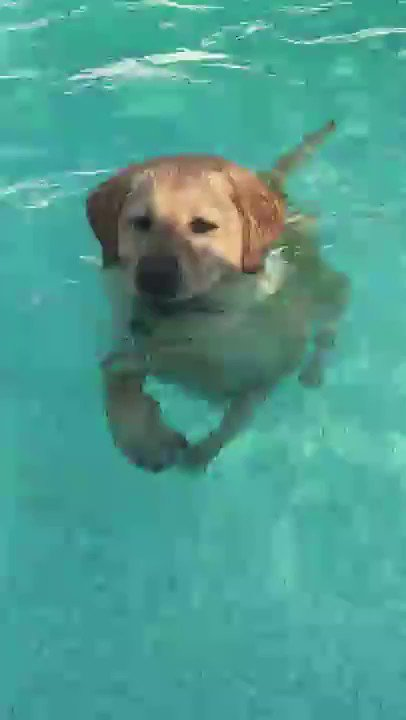

In [49]:
Image(retweeted.jpg_url.values[0])

In [50]:
vid_url = retweeted.extended_entities.values[0]['media'][0]['video_info']['variants'][0]['url']
max_retweeted_vid = requests.get(vid_url).content
with open('max_retweeted_vid.mp4','wb') as file:
    file.write(max_retweeted_vid)
Video('max_retweeted_vid.mp4')

#### Findings
The most retweeted tweet with `tweet_id 744234799360020481` was a picture of Labrador Retriever. The neural network had a confidence level of 82% that it was Labrador Retriever.

### Insight #3 In the most favorited tweet, what was the dog breed?

In [51]:
max_count = master_df.favorite_count.max()
favorite = master_df[master_df['favorite_count'] == max_count]
favorite[['tweet_id','text','favorite_count']]

,tweet_id,text,favorite_count
348,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,132810


In [52]:
favorite[['p1','p1_conf','p2','p2_conf','p3','p3_conf']]

,p1,p1_conf,p2,p2_conf,p3,p3_conf
348,lakeland terrier,0.196015,labrador retriever,0.160329,irish terrier,0.069126


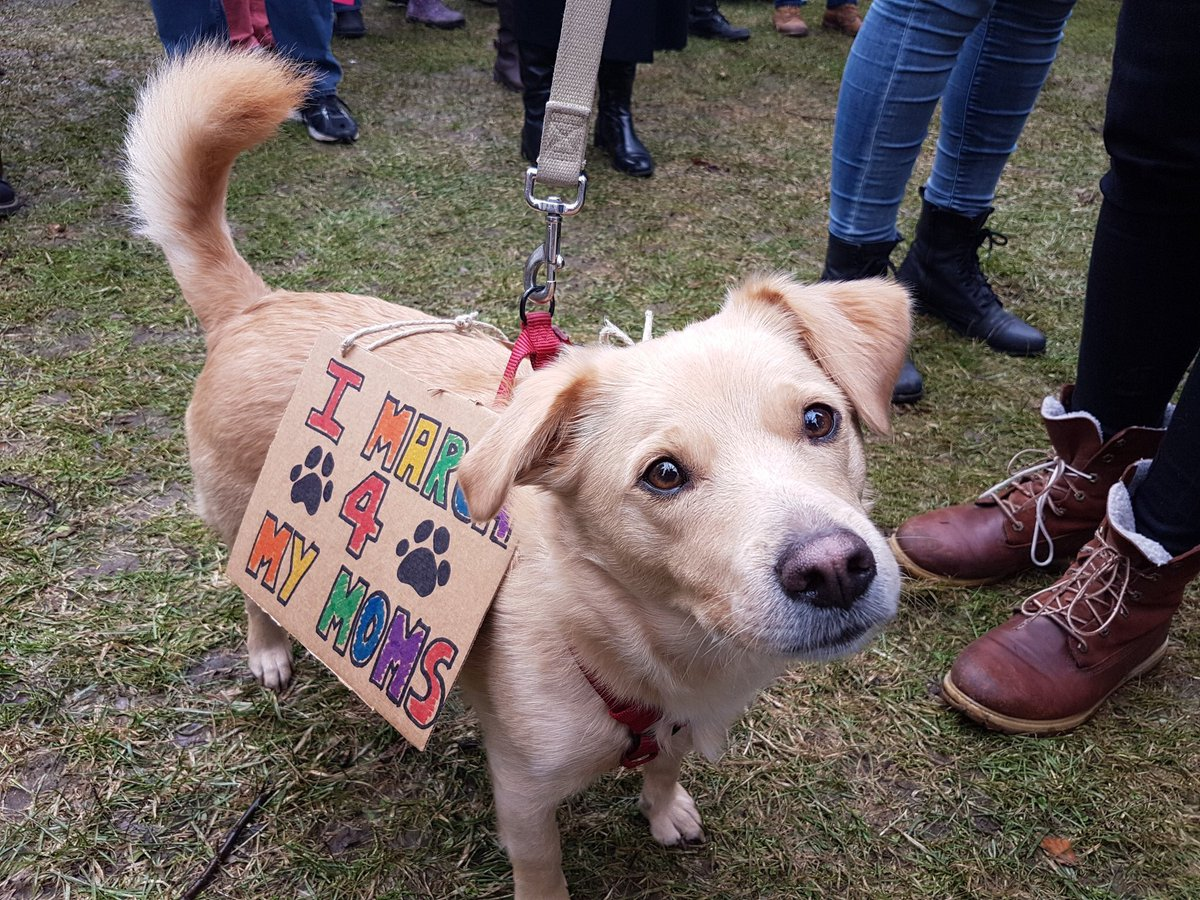

In [53]:
Image(favorite.jpg_url.values[0])

#### Findings
The most favorited tweet with `tweet_id 822872901745569793` was the above picture and the neural network had a confidence level of 70% that it was Irish Terrier.

### Visualization #1: Is there a trend where tweets featuring dogs in a particular stage are more likely to be retweeted or favorited.

In [54]:
##Pick tweets with dog_stages
dogstage_df = master_df[master_df.dog_stage.notnull()]
# Get the total count of retweets and favorites
total_retweets = sum(dogstage_df.retweet_count)
total_favorites = sum(dogstage_df.favorite_count)
#Get the dog stages
stages = dogstage_df.dog_stage.unique()
retweets_prop = []
favorites_prop = []
# Loop through the stages and calculate the proportions
for stage in stages:
    retweets_prop.append(sum(dogstage_df.query(f"dog_stage == '{stage}'").retweet_count) / total_retweets)
    favorites_prop.append(sum(dogstage_df.query(f"dog_stage == '{stage}'").favorite_count ) / total_favorites)

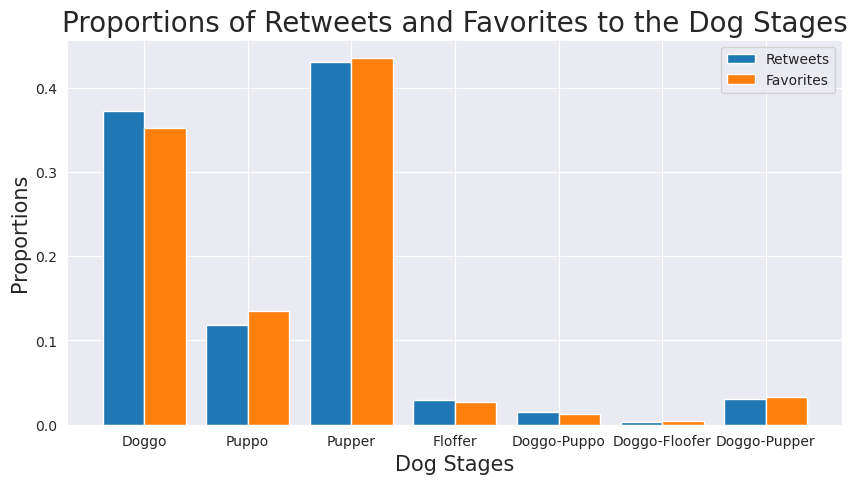

In [55]:
stages = ['Doggo','Puppo','Pupper','Floffer','Doggo-Puppo','Doggo-Floofer','Doggo-Pupper']
ticks = np.arange(len(stages))
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(ticks - 0.2, retweets_prop , 0.4, label = 'Retweets')
ax.bar(ticks + 0.2, favorites_prop, 0.4, label = 'Favorites')
ax.set_xticks(ticks, stages)
ax.set_xlabel("Dog Stages",size=15)
ax.set_ylabel("Proportions",size=15)
ax.set_title("Proportions of Retweets and Favorites to the Dog Stages",size=20)
ax.legend()
plt.show();

#### Findings
We can see that Pupper had the most favorites and retweets with 43% while Doggo coming up second with around 37%

### Visualization #2: Is there a relationship between retweet_count and ratings?

In [56]:
ret_fav_df = master_df.groupby('rating_numerator')['retweet_count'].max()
ratings = master_df[master_df['rating_numerator'].notnull()].rating_numerator.unique()
ret_fav_df

rating_numerator
0.00        3443
0.10       24319
0.11        4548
0.12        1727
0.13         437
0.80        1136
0.90        1854
1.00        6871
2.00        4485
3.00        2233
4.00        2763
5.00        5174
6.00        3444
7.00        7445
8.00        5515
9.00        6750
9.50         313
9.75        7069
10.00      33421
11.00      24069
11.26        542
11.27       1885
12.00      30742
13.00      79515
13.50      10407
14.00      42228
17.00          7
420.00      4324
1776.00     2772
Name: retweet_count, dtype: int64

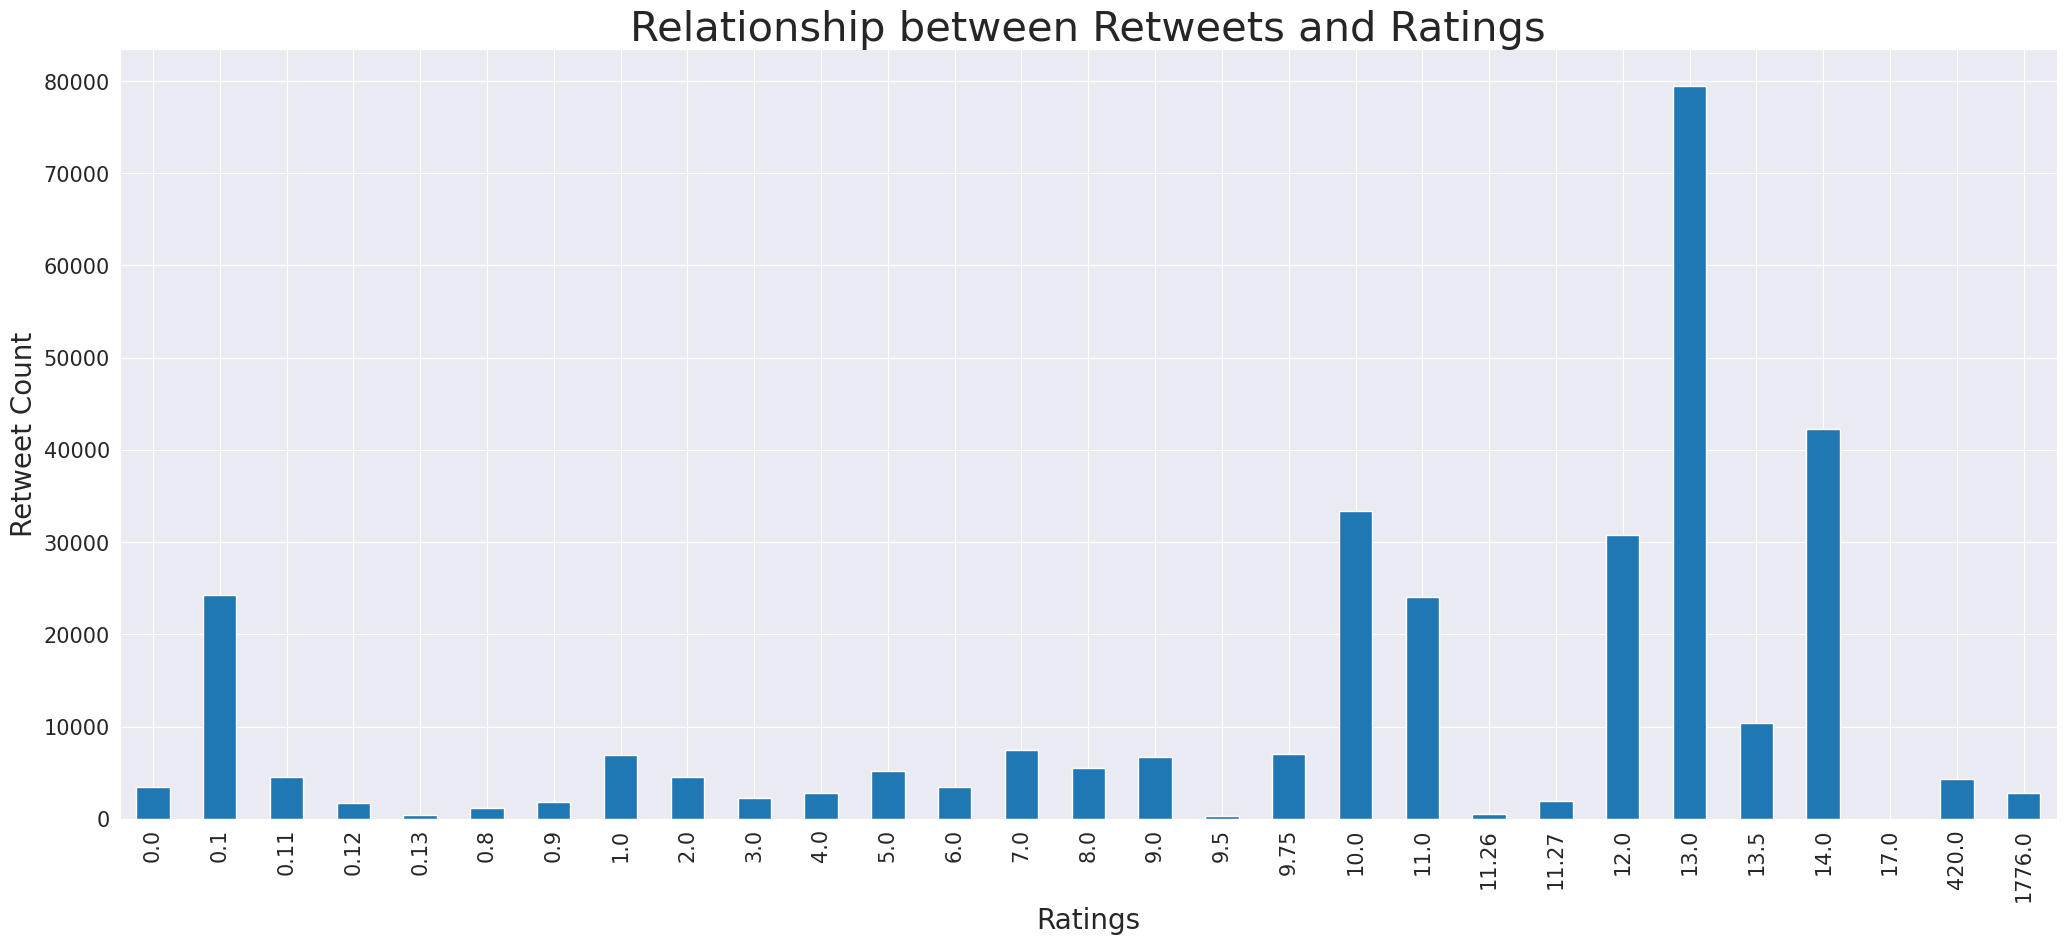

In [57]:
from matplotlib import ticker
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(25,10))
ret_fav_df.plot.bar()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel("Ratings",size=20)
ax.set_ylabel("Retweet Count",size=20)
plt.xticks(size=15)
plt.yticks(size=15)
ax.set_title("Relationship between Retweets and Ratings",size=30)
plt.show();

In [58]:
master_df.groupby('rating_numerator')['retweet_count'].count()

rating_numerator
0.00         2
0.10         9
0.11         4
0.12         2
0.13         1
0.80         1
0.90         3
1.00         7
2.00         9
3.00        19
4.00        15
5.00        34
6.00        32
7.00        53
8.00        97
9.00       152
9.50         1
9.75         1
10.00      434
11.00      420
11.26        1
11.27        1
12.00      492
13.00      299
13.50        1
14.00       43
17.00        1
420.00       2
1776.00      1
Name: retweet_count, dtype: int64

#### Findings
We can observe that tweets with a rating of **13/10** had the most retweets with a max retweet of **79,515** while the highest rating **1776/10** had a maximum of **2772** retweets. The difference could be that the score 1776/10 was only featured in a single tweet while **13/10** was used **299** times! The most used score was **12/10** with it being used **492** times, it had a max retweet of **33,421**.